In [14]:
import sys
# sys.path.append("./") # go to parent dir
# sys.path.append("/Users/paulkreymborg/Documents/code/VMTutorial_pjk/2024_tests")
# print(sys.path)
import os
import pandas as pd
import plotly.express as px
import json
# import code
from simcode.plot_cells import visualize
# import code.plot_cells.visualize
import numpy as np

# code.plot_cells
# print(dir(code))


[{'field_type': 'constant_field_polygon_bounded', 'E_x': 0.0, 'E_y': 0.02, 'zone_bounds': {'polygon_vertices': [[-7.5, -7.5], [0, -7.5], [0, 7.5], [-7.5, 7.5]]}}, {'field_type': 'constant_field_polygon_bounded', 'E_x': 0.0, 'E_y': -0.02, 'zone_bounds': {'polygon_vertices': [[0, -7.5], [7.5, -7.5], [7.5, 7.5], [0, 7.5]]}}]
{'vertices': [[-7.5, -7.5], [0, -7.5], [0, 7.5], [-7.5, 7.5]], 'center_x': -3.75, 'center_y': -0.0, 'E_n_x': 0.0, 'E_n_y': 1.0}
{'vertices': [[0, -7.5], [7.5, -7.5], [7.5, 7.5], [0, 7.5]], 'center_x': 3.75, 'center_y': -0.0, 'E_n_x': 0.0, 'E_n_y': -1.0}


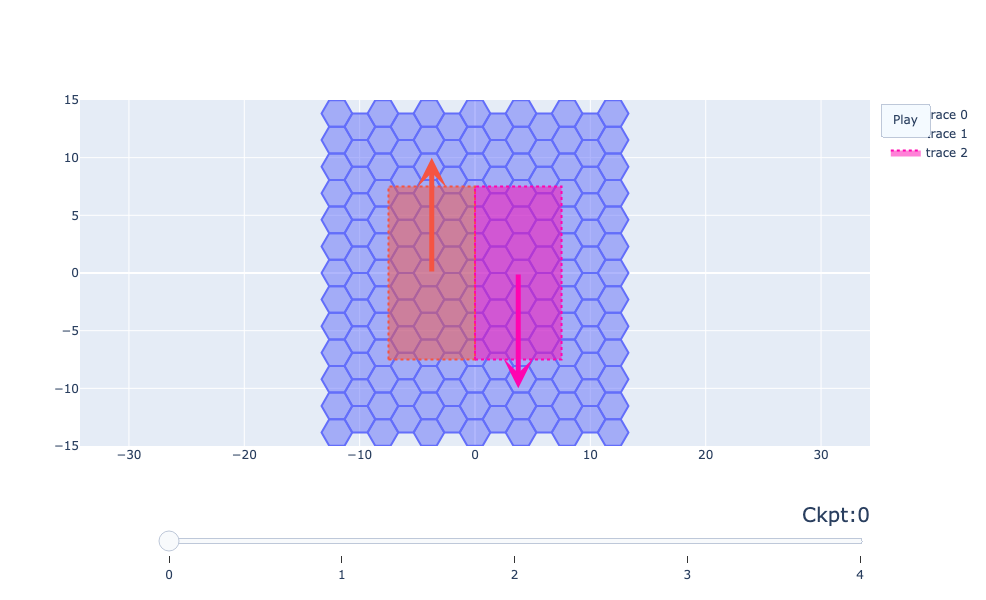

In [23]:



ckpts_dir = "../scratch/"
tiss_ckpt_fps = []
for fn in sorted(os.listdir(ckpts_dir)):
    # print(fn)
    if fn.endswith(".json") and fn.startswith("res"):
        tiss_ckpt_fps.append(os.path.join(ckpts_dir, fn))
# tiss_ckpt_fns = sorted([fn for fn in os.listdir(ckpts_dir) if fn.endswith(".json") and fn.startswith("res")])

visualize.make_plotly_visualizer(
    tiss_ckpt_fps,
    "../scratch/initial_vm_state.json"
    # vertices_to_highlight=[0],
)


In [3]:
# from tissue_builder.hexagonal import HexagonalCellMesh
# # import plotly.graph_objects as go
# # fig = go.Figure(go.Scatter(x=[1,3,None,2,4], y=[4,2,None,4,2],
# #             marker= dict(size=10,symbol= "arrow-bar-up", angleref="previous")))
# # fig.update_layout(width=500, height=300)
# # fig.show()


# list(init_vmstate['current_state']['forces'].keys())

In [4]:
# # import json
# import shapely
# with open("../scratch/initial_vm_state.json", "r") as f:
#     init_vmstate = json.load(f)
    
# def plot_fields(vmstate):
#     elec_fields = []
#     for fid, fspec in vmstate['current_state']['forces'].items():
#         if fspec['type'] == "electric_cell_boundary_force":
#             elec_fields.append(fspec['field_spec'])
#     print(elec_fields)
#     for e_f_spec in elec_fields:
#         poly_bounds = shapely.Polygon(e_f_spec["zone_bounds"]["polygon_vertices"])
#         zone_center = shapely.centroid(poly_bounds)
#         print(zone_center.x)

# plot_fields(init_vmstate)
# # # cm = HexagonalCellMesh(
# # #     side_length=1.0,
# # #     box_lx=3,
# # #     box_ly=3,
# # # )
# # # cm.set_all_A0(1)
# # # cm.set_all_P0(1)
# # # cm.build_vm_mesh("../scratch/nb_example.json")

# # with open("../scratch/example.json") as f:
# #     exam_obj = json.load(f)

# # # exam_obj